In [42]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

plt.rcParams["font.sans-serif"] = ["Simhei"]
mpl.rcParams["axes.unicode_minus"] = False
# 真实数据
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
# 转为array
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [63]:
# 原始公式 y = wx + b
w = -4
b = -120
b_history = [b]
w_history = [w]
lr_b = 0
lr_w = 0
for _ in range(100000):
    w_grad, b_grad = 0.0, 0.0
    # 求出w和b的偏导
    for n in range(len(x_d)):
        w_grad = w_grad - 2 * (y_d[n] - w * x_d[n] - b)* x_d[n]
        b_grad = b_grad - 2*(y_d[n] - w*x_d[n] - b)
    
    # 新的rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # 更新参数w和b
    b = b - 1 / np.sqrt(lr_b) * b_grad
    w = w - 1 / np.sqrt(lr_w) * w_grad
    b_history.append(b)   
    w_history.append(w)
print("误差最小时，b={} w={}".format(b_history[-1], w_history[-1]))

误差最小时，b=-188.36683874953226 w=2.6692640713379903


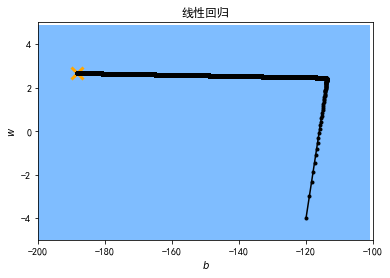

In [64]:
x= np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x),len(y)))
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()